<a href="https://colab.research.google.com/github/Panagiotis-Bosinas/Machine_Learning_Assignments/blob/main/Ergasia10_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [114]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import euclidean_distances,cosine_similarity

## Ερώτημα 1

In [115]:
df = pd.read_csv('dataset.csv')
df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


To dataset έχει πολλά dublicates

In [116]:
df = df.drop_duplicates(subset='track_id')

In [117]:
df_ids = df[['Unnamed: 0','track_id','artists','album_name','track_name']]

df_features = df.drop(columns=['Unnamed: 0','track_id','artists','album_name','track_name'],errors='ignore')

In [118]:
df_features.head()

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [119]:
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
genre_encoded = encoder.fit_transform(df_features[['track_genre']])
genre_columns = encoder.get_feature_names_out(['track_genre'])

df_genre_encoded = pd.DataFrame(genre_encoded,columns=genre_columns,index=df_features.index)
df_features = pd.concat([df_features.drop(columns=['track_genre']), df_genre_encoded],axis=1)

## Ερώτημα 2

In [120]:
x = df_features.to_numpy()
y = df_genre_encoded.to_numpy()

scaler = StandardScaler()

x_std = scaler.fit_transform(x)
x_std.shape

(89741, 128)

## Ερώτημα 3

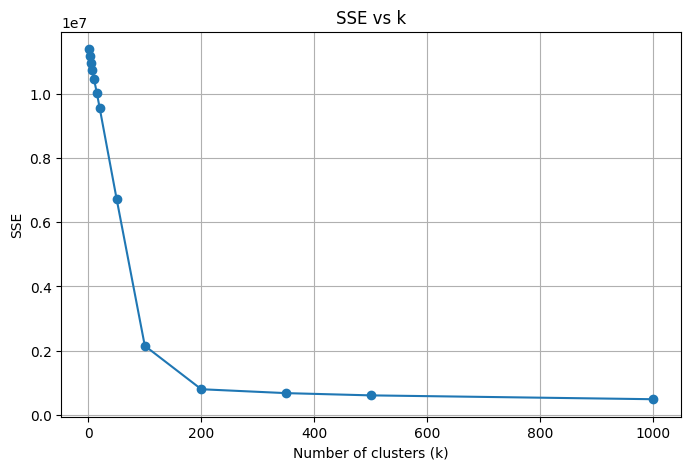

In [121]:
k_values = [2, 3, 5, 7, 10, 15, 20, 50, 100, 200, 350, 500, 1000]
sse = []
seed = 0
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=seed)
    kmeans.fit(x_std)
    sse.append(kmeans.inertia_)


plt.figure(figsize=(8,5))
plt.plot(k_values, sse, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('SSE')
plt.title('SSE vs k')
plt.grid(True)
plt.show()

## Ερώτημα 4

Το elbow εμφανίζεται σε υπερβολικά υψηλό k. ΑΠό τα αρχικά k επιλέγεται επομένως η τιμή k=20.

In [122]:
best_k = 20
kmeans_final = KMeans(n_clusters=best_k, random_state=seed)
kmeans_final.fit(x_std)

cluster_labels = kmeans_final.labels_

## Ερώτημα 5

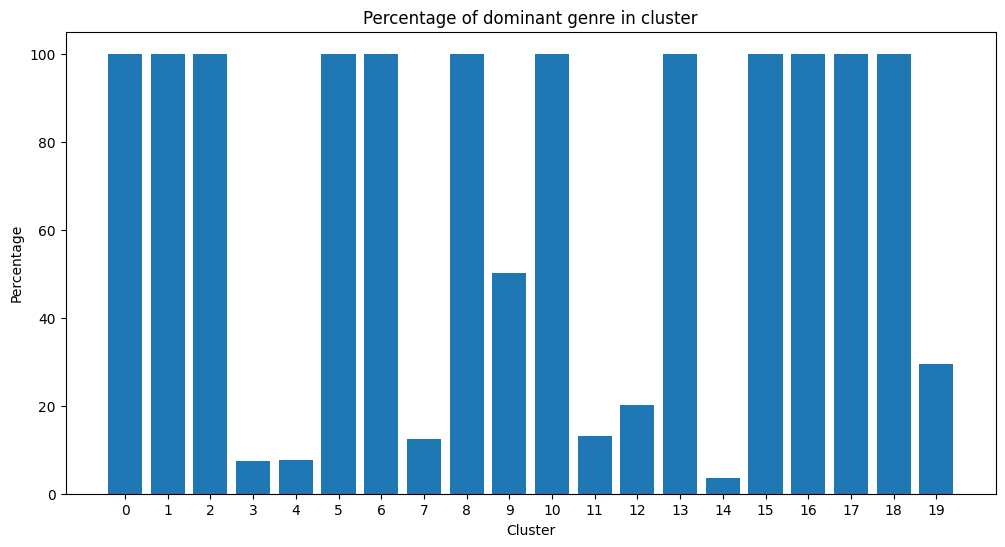

In [123]:
df['cluster'] = cluster_labels

dom_genre_percentage = []
cluster_ids = []

for cluster_id in range(best_k):
    cluster_data = df[df['cluster'] == cluster_id]
    genre_counts = cluster_data['track_genre'].value_counts()
    dominant_genre = genre_counts.index[0]
    dominant_count = genre_counts.iloc[0]

    percentage = (dominant_count / len(cluster_data)) * 100

    dom_genre_percentage.append(percentage)
    cluster_ids.append(cluster_id)


plt.figure(figsize=(12, 6))
plt.bar(cluster_ids, dom_genre_percentage)
plt.xlabel('Cluster')
plt.ylabel('Percentage')
plt.title('Percentage of dominant genre in cluster')
plt.xticks(cluster_ids)
plt.show()

Είναι εμφανές ότι σε ορισμένα clusters το dominant genre έχει ποσοστό 100%, επομένως το μοντέλο το ομαδοποιεί σωστά, ενώ σε άλλα clusters το ποσοστό είναι πολύ μικρό, που υποδηλώνει ότι κάποια genres δεν μπορεί να τα διαχωρίσει και τα μαζεύει μεταξύ τους. Βεβαια, έχουμε ορίσει 20 clusters, ενώ έχουμε συνολικά 125 διαφορετκικά genres. Επομένως, είναι λογικό.

In [124]:
cluster_8 = df[df['cluster'] == 8]
genre_counts_cluster_8 = cluster_8['track_genre'].value_counts()
print(f"Genres στο Cluster 8:")
print(genre_counts_cluster_8)

Genres στο Cluster 8:
track_genre
grindcore    985
Name: count, dtype: int64


Για παράδειγμα, από το παραπάνω βλέπουμε ότι το cluster 8 περιέχει κυρίως τα διάφορα ήδη metal μουσικής. Οπότε πράγματι, λόγω του περιορισμού του αριθμού των clusters επιλέγει σωστά να ομαδοποιήσει παρόμοια μουσικά ήδη.

## Ερώτημα 6

In [125]:
track_index = 2025
selected_track = df_ids.loc[track_index]
selected_cluster = cluster_labels[track_index]

print(f"Τραγούδι:")
print(f"Τίτλος: {selected_track['track_name']}")
print(f"Καλλιτέχνης: {selected_track['artists']}")
print(f"Cluster: {selected_cluster}")
print()

Τραγούδι:
Τίτλος: Black Summer
Καλλιτέχνης: Red Hot Chili Peppers
Cluster: 14



Πρέπει να επιλέξουμε τα τραγούδια από το ίδιο cluster, να υπολογίσουμε τις αποστάσεις και να τα ταξινομίσουμε με βάση την ελάχιστη απόσταση.

In [126]:
cluster_indices = np.where(cluster_labels == selected_cluster)[0]

sel_features = x_std[track_index].reshape(1, -1)
cluster_features = x_std[cluster_indices]

distances = euclidean_distances(sel_features, cluster_features)[0]

distance_pairs = []
for i, idx in enumerate(cluster_indices):
    if idx != track_index:
        distance_pairs.append((idx, distances[i]))

distance_pairs.sort(key=lambda x: x[1])
top_3 = distance_pairs[:3]

print("Top-3 παρόμοια κομμάτια:")
for i, (idx, dist) in enumerate(top_3, 1):
    track_info = df_ids.loc[idx]
    print(f"{i}. {track_info['track_name']} - {track_info['artists']}")
    print(f"Euclidean Distance: {dist:.4f}")

Top-3 παρόμοια κομμάτια:
1. Human - Armin van Buuren Dub Remix - The Killers;Armin van Buuren;Benno De Goeij
Euclidean Distance: 0.0486
2. Tippa My Tongue - Red Hot Chili Peppers
Euclidean Distance: 0.0972
3. Nerve Flip - Red Hot Chili Peppers
Euclidean Distance: 0.0972


Το πρώτο προτεινόμενο τραγούδι δεν μοιάζει με το επιλεγμένο τραγούδι. Τα επόμενα δύο είναι καλές προτάσεις (τυχαίνει να ανήκουν και στο ίδιο συγκρότημα)

## Ερώτημα 7

In [127]:
cosine_sim = cosine_similarity(sel_features, cluster_features)[0]


cosine_dist = 1 - cosine_sim


distance_pairs_cosine = []
for i, idx in enumerate(cluster_indices):
    if idx != track_index:
        distance_pairs_cosine.append((idx, cosine_dist[i]))

distance_pairs_cosine.sort(key=lambda x: x[1])
top_3_cosine = distance_pairs_cosine[:3]

print("Top-3 παρόμοια κομμάτια :")
for i, (idx, dist) in enumerate(top_3_cosine, 1):
    track_info = df_ids.loc[idx]
    print(f"{i}. {track_info['track_name']} - {track_info['artists']}")
    print(f"Cosine Distance: {dist:.4f}")

Top-3 παρόμοια κομμάτια :
1. Human - Armin van Buuren Dub Remix - The Killers;Armin van Buuren;Benno De Goeij
Cosine Distance: 0.0000
2. Tippa My Tongue - Red Hot Chili Peppers
Cosine Distance: 0.0000
3. Nerve Flip - Red Hot Chili Peppers
Cosine Distance: 0.0000


Με cosine distance προκυπτουν τα ίδια αποτελέσματα.

## Ερώτημα 9

In [128]:
dbscan = DBSCAN()
dbscan_labels = dbscan.fit_predict(x_std)

n_clusters_dbscan = len(set(dbscan_labels))
n_noise = list(dbscan_labels).count(-1)
print(f"DBSCAN Αποτελέσματα:")
print(f"Αριθμός Clusters: {n_clusters_dbscan}")
print(f"K-means (ερώτημα 4): {best_k} clusters")

DBSCAN Αποτελέσματα:
Αριθμός Clusters: 316
K-means (ερώτημα 4): 20 clusters


To DBSCAN είναι πιο κοντά στο πραγματικό elbow. Το χωρίζει σε πολύ παραπάνω clusters από αυτά που υπάρχουν στην πραγματικότητα